## Plotting the output of the Sigma and DeltaSigma computed from batch jobs. 

## Setup

In [8]:
## testing multidark
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
import h5py
import astropy.io.fits as fits
import csv
import pickle
import pandas as pd
import h5py
import tables
import os
from astropy.table import Table
from astropy.coordinates import SkyCoord
from tqdm import tqdm
from astropy.io import ascii
import os

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Reading the files

In [9]:
datadir = './'

In [10]:
## Read the Files. 
files = ['sigma_mvir_5e13_1e14_z0p00.pkl', 'sigma_mvir_1e14_2e14_z0p00.pkl', 'sigma_mvir_2e14_5e14_z0p00.pkl', 'sigma_mvir_5e14_1e15_z0p00.pkl']
mvir_bins = ['5e13-1e14', '1e14-2e14', '2e14-5e14', '5e14-1e15']
r_range_norm = np.logspace(-0.15,1,10) #Used for computing the files. 

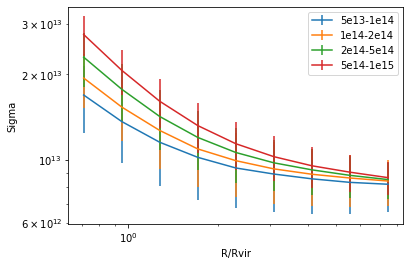

In [28]:
#sigma_mvir_binned = {}
for i, file in enumerate(files):
    with open(datadir+file, 'rb') as handle: 
        sigma_output = pickle.load(handle)
    
    ##Reading the DS
    sigma_mpi_mean = np.mean(sigma_output['sigma'], axis=0)
    sigma_mpi_err = np.std(sigma_output['sigma'], axis=0)

 
    plt.errorbar(r_range_norm[:-1], sigma_mpi_mean, yerr=sigma_mpi_err, label=mvir_bins[i])
    
plt.xlabel('R/Rvir')
plt.ylabel('Sigma')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

In [27]:
np.shape(sigma_output['r_range'])

(500, 10)